In [1]:
import os
import sys
import math
import numpy as np
import pyfftw as ft 
import matplotlib
import matplotlib.pyplot as plt

(12, 250)


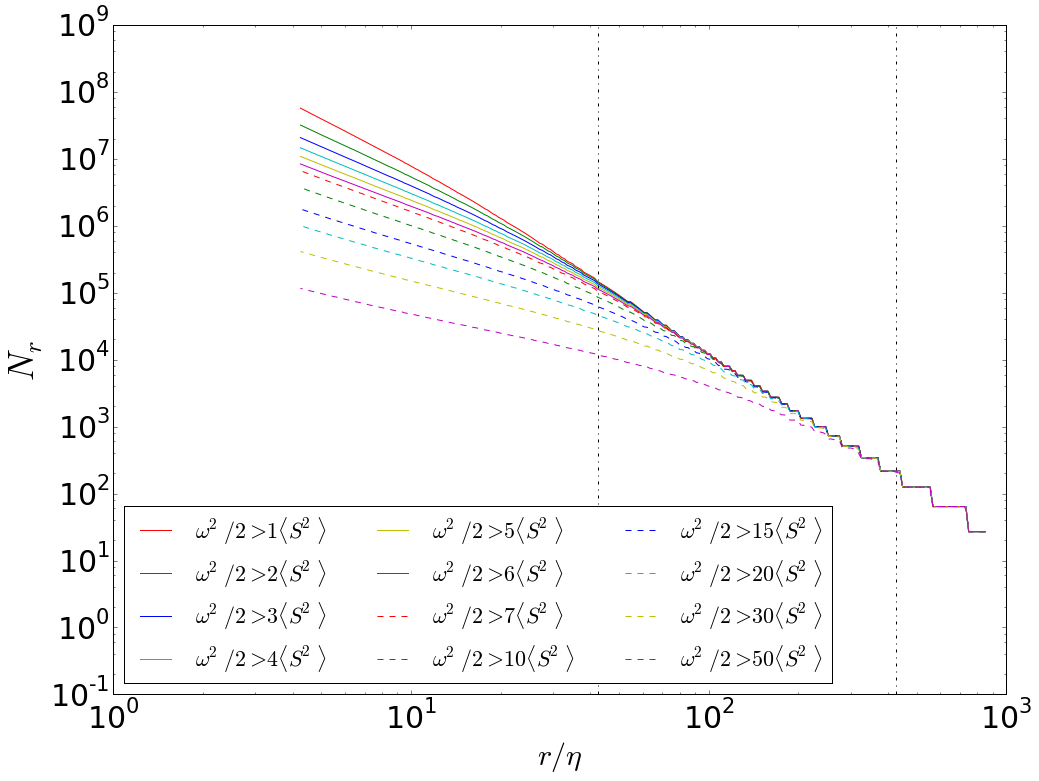

In [5]:
%matplotlib inline

otype = 'enstrophy'
name = 'boxcount-excursion-'+otype+'-dims'
filename = name+'.npz'
content = np.load(filename)

tfboxes = content['tfboxes']

print(tfboxes.shape)

eta = 0.00280
thresholds = [1,2,3,4,5,6,7,10,15,20,30,50]
colors = ['r','g','b','c','y','m','r','g','b','c','y','m']
scales = np.logspace(np.log(2*425*eta),np.log(0.1*42.5*eta), num=250, endpoint=True, base=np.e)

idx = scales<20.*eta 
Idx = scales>450.*eta

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=30)
plt.ylabel(r'$N_r$',size=35)
plt.ylim([10**(-1),10**9])

for i in range(0,6,1):
    t = thresholds[i]
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    if(otype == 'enstrophy'):
        plt.loglog(scales/eta,ct,c+'-',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $'.format(t))
    else:
        plt.loglog(scales/eta,ct,c+'-',label=r'$S^2 > {:6.0f}\langle S^2\rangle $'.format(t))
    
for i in range(6,12,1):
    t = thresholds[i]
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    if(otype == 'enstrophy'):
        plt.loglog(scales/eta,ct,c+'--',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $'.format(t))
    else:
        plt.loglog(scales/eta,ct,c+'--',label=r'$S^2 > {:6.0f}\langle S^2\rangle $'.format(t))
    
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.legend(loc='lower left',prop={'size':22},ncol=3)
plt.savefig(name+'.pdf', bbox_inches='tight')